<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject2/Mini_project2_SantiagoRuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini-proyecto 2:
Aplicar un análisis de reducción de dimensionalidad con PCA y una selección de atributos relevantes utilzando la técnica Recursive Feature Elimination (RFE):

Se pueden utilizar las BBDD siguientes u otras que encontréis en Kaggle o UCI datasets:

Hotels bookings: Datos sobre reservas en hoteles, con datos de duración de la reserva, cancelaciones, etc. https://www.kaggle.com/jessemostipak/hotel-booking-demand

Iris flowers dataset: Medidas de pétalos y sépalos de flores para clasificarlas según diferentes tipos de especies botánicas https://www.kaggle.com/uciml/iris

Wine properties and quality: Datos sobre características químicas de vinos y un indicador de calidad: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Netflix movies: Datos sobre películas de netflix con fecha 2019, incluye datos del casting y valoración de los usuarios https://www.kaggle.com/shivamb/netflix-shows

US COVID-19 dataset: Datos sobre contaje de casos en condados de Estados Unidos: https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset

US crash accidents: Datos sonbre accidentes de tráfico en Estados Unidos https://www.kaggle.com/sobhanmoosavi/us-accidents

Suicide Rates: Datos sobre suicidios https://www.kaggle.com/kralmachine/data-visualization-of-suicide-rates


Barcelona data: Estadísticas sobre población, economía, negocios, etc. https://www.kaggle.com/xvivancos/barcelona-data-sets

**Importacion de datos**

In [106]:
!wget -O winequality-redd.csv 'https://raw.githubusercontent.com/santiagoruizs/newrep/master/winequality-red.csv'

--2020-04-20 19:48:27--  https://raw.githubusercontent.com/santiagoruizs/newrep/master/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-redd.csv’

winequality-redd.cs 100%[===================>]  98.58K  --.-KB/s    in 0.04s   

2020-04-20 19:48:27 (2.64 MB/s) - ‘winequality-redd.csv’ saved [100951/100951]



In [0]:
import pandas as pd
df = pd.read_csv('/content/winequality-redd.csv')


In [108]:
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [109]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [123]:
ds=df.shape
print("hay {} variables y {} observaciones".format(ds[0],ds[1]))

hay 1599 variables y 12 observaciones


Escojo todas las variables excepto la calidad ya que despues la usare como criterio de comparación

In [111]:
dfnum=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
dfnum.shape

(1599, 11)

In [112]:
dfnum.describe()

fixed acidity  volatile acidity  ...    sulphates      alcohol
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...     0.658149    10.422983
std         1.741096          0.179060  ...     0.169507     1.065668
min         4.600000          0.120000  ...     0.330000     8.400000
25%         7.100000          0.390000  ...     0.550000     9.500000
50%         7.900000          0.520000  ...     0.620000    10.200000
75%         9.200000          0.640000  ...     0.730000    11.100000
max        15.900000          1.580000  ...     2.000000    14.900000

[8 rows x 11 columns]

In [113]:
dfnum.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Todas las variables son numericas y no contiene NaN, ya que en el describe todas las viriables tienen el mismo conteo de datos

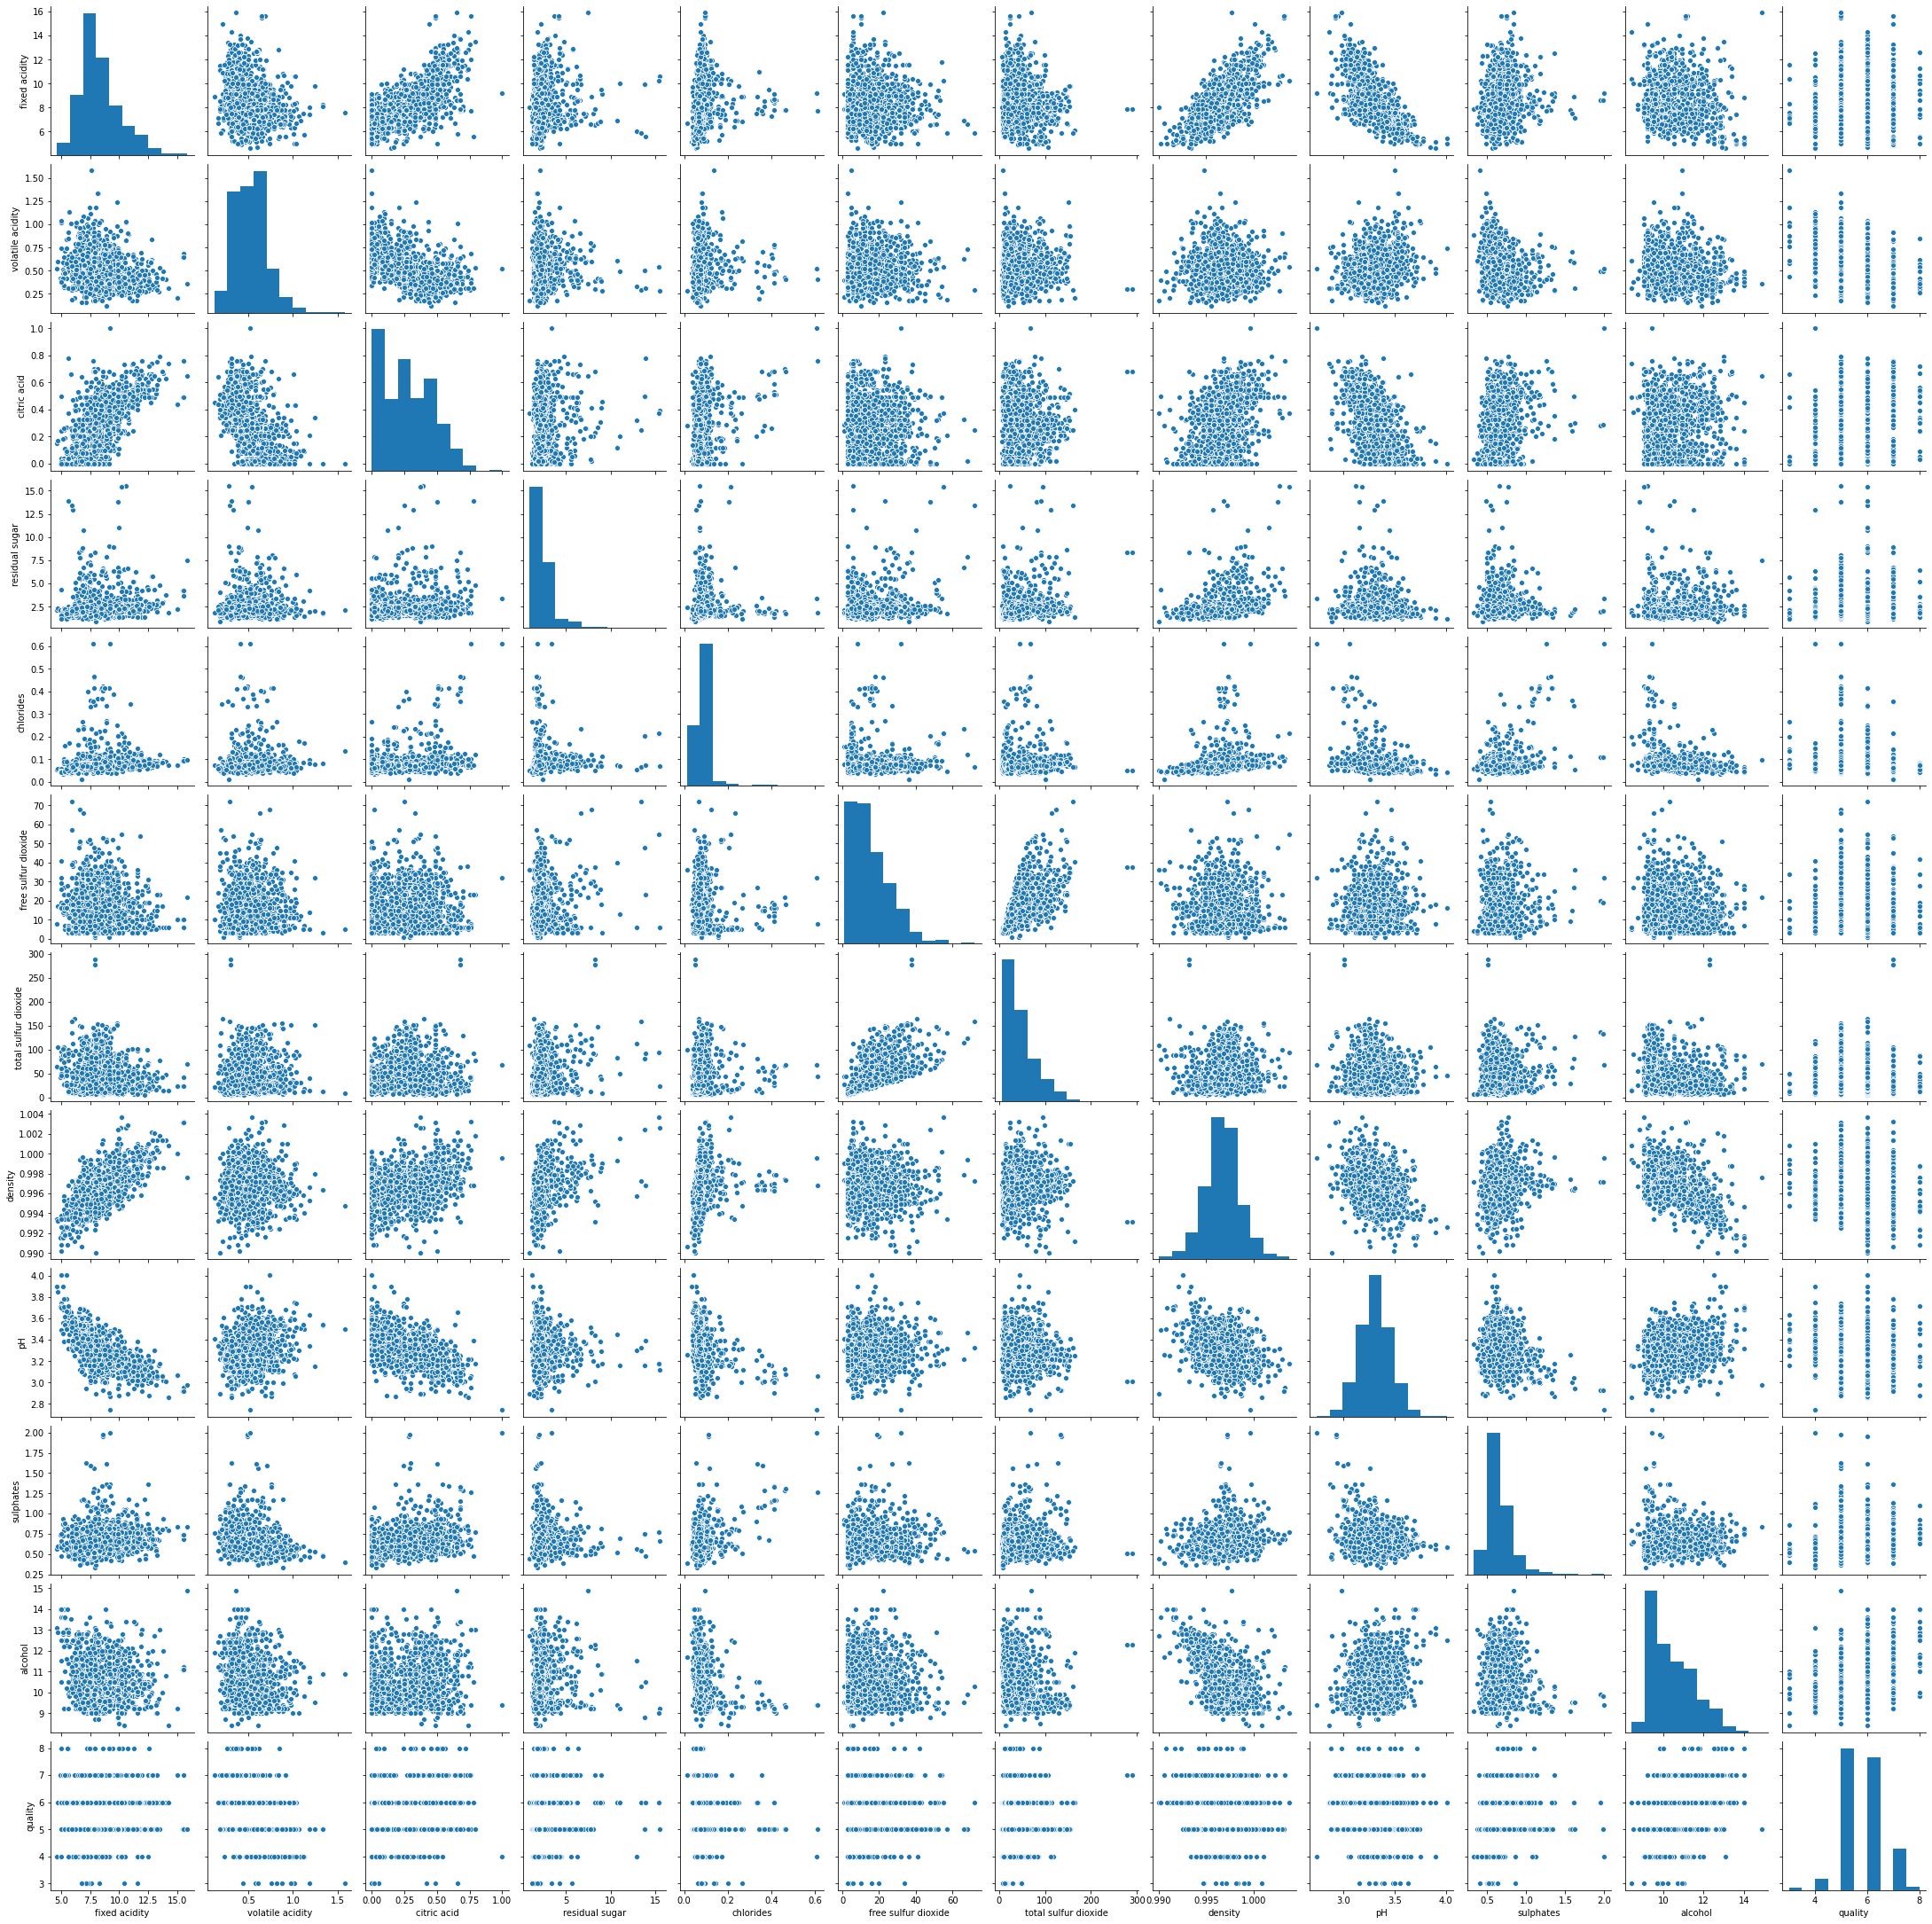

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(dfnum)

In [0]:
from sklearn import decomposition
l=len(dfnum.columns)
pca = decomposition.PCA(n_components=l).fit(XS)

In [117]:
Xproj = pca.transform(XS)
Xproj.shape

(1599, 11)

In [118]:
100*pca.explained_variance_ratio_.cumsum()

array([ 28.17393128,  45.68220118,  59.77805108,  70.80743772,
        79.52827474,  85.52471351,  90.83190641,  94.67696732,
        97.81007747,  99.4585608 , 100.        ])

Aqui se puede observar que con 7 datos se puede obtener el 90%

In [119]:
100*pca.explained_variance_ratio_

array([28.17393128, 17.50826991, 14.0958499 , 11.02938664,  8.72083701,
        5.99643877,  5.3071929 ,  3.84506091,  3.13311015,  1.64848333,
        0.5414392 ])

In [120]:
dfpca = pd.DataFrame(Xproj[:,0:7])
dfpca.shape

(1599, 7)

En este pair plot se nota que en este espacio no hay correlacion entre las variables lo cual resulta coherente

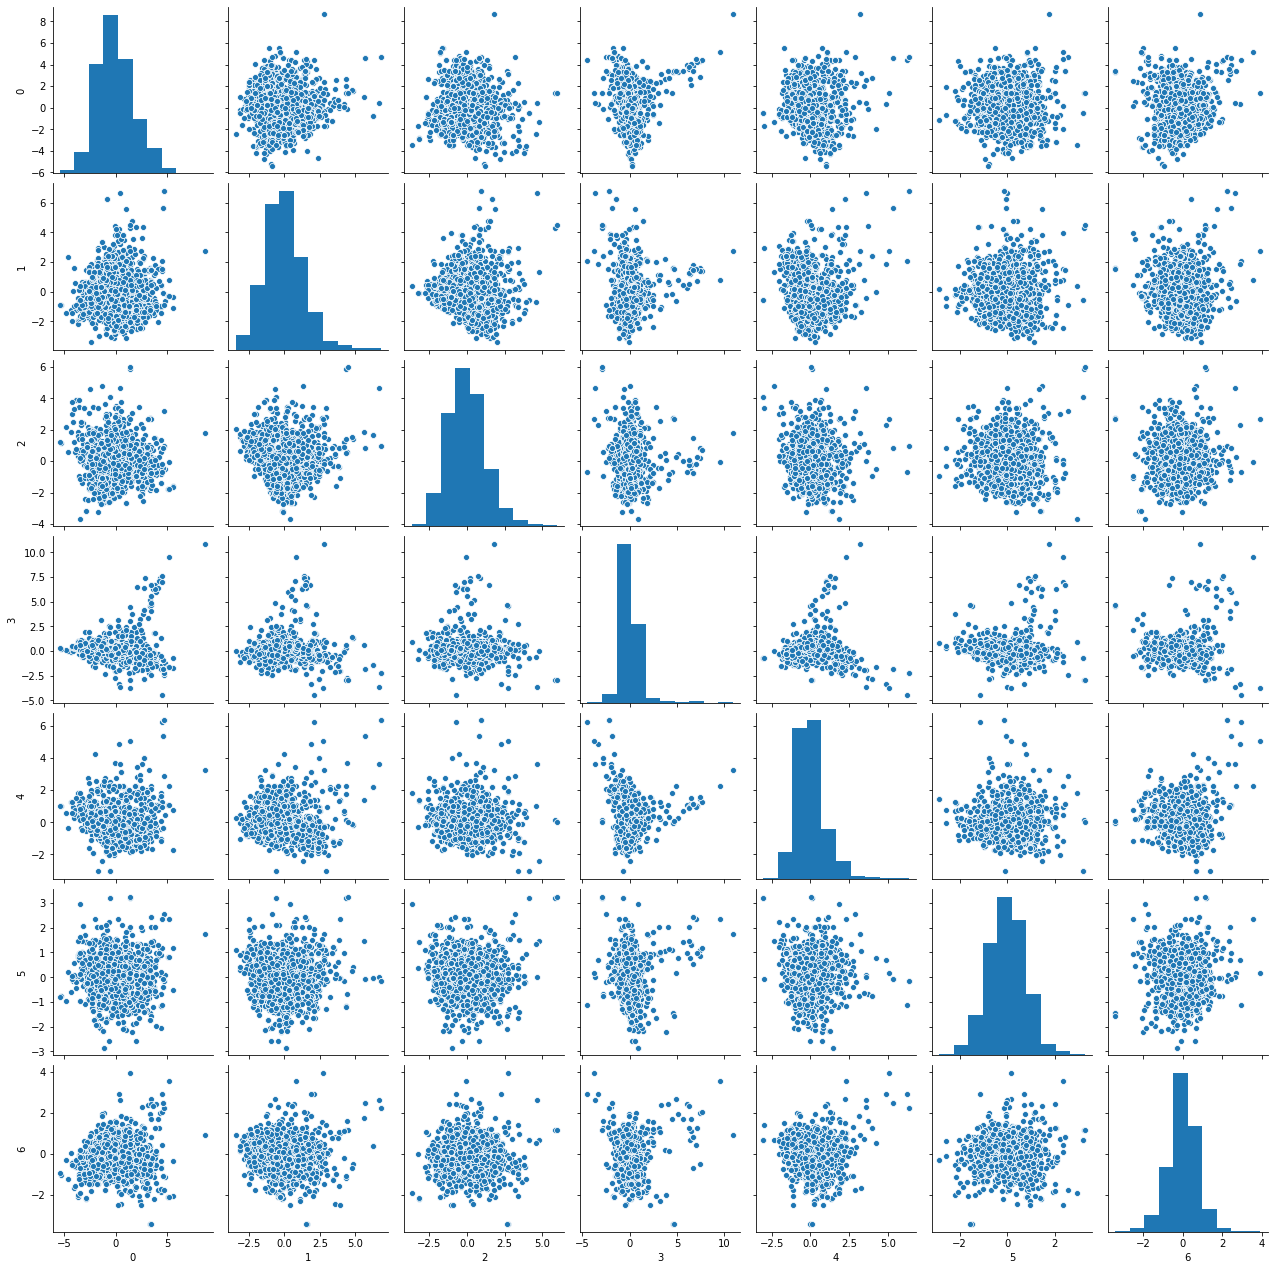

In [121]:
sns.pairplot(dfpca)

In [124]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
y = df['quality']
print('Data shape: {}'.format(dfnum.shape))
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(dfnum, y)
print('Mantained features: {}'.format(rfe.support_))
print('Ranking of features : {}'.format(rfe.ranking_))

Data shape: (1599, 11)
Mantained features: [False  True False False False False False False False False False]
Ranking of features : [ 8  1  6  7  5  9 11 10  3  2  4]


Aqui podemos ver que la segunda variable es la que aporta mas en torno a la calificacion segun el RFE, y abajo un pairplot de la informacion para hacer una comparacion grafica con la calculada

<function matplotlib.pyplot.show>

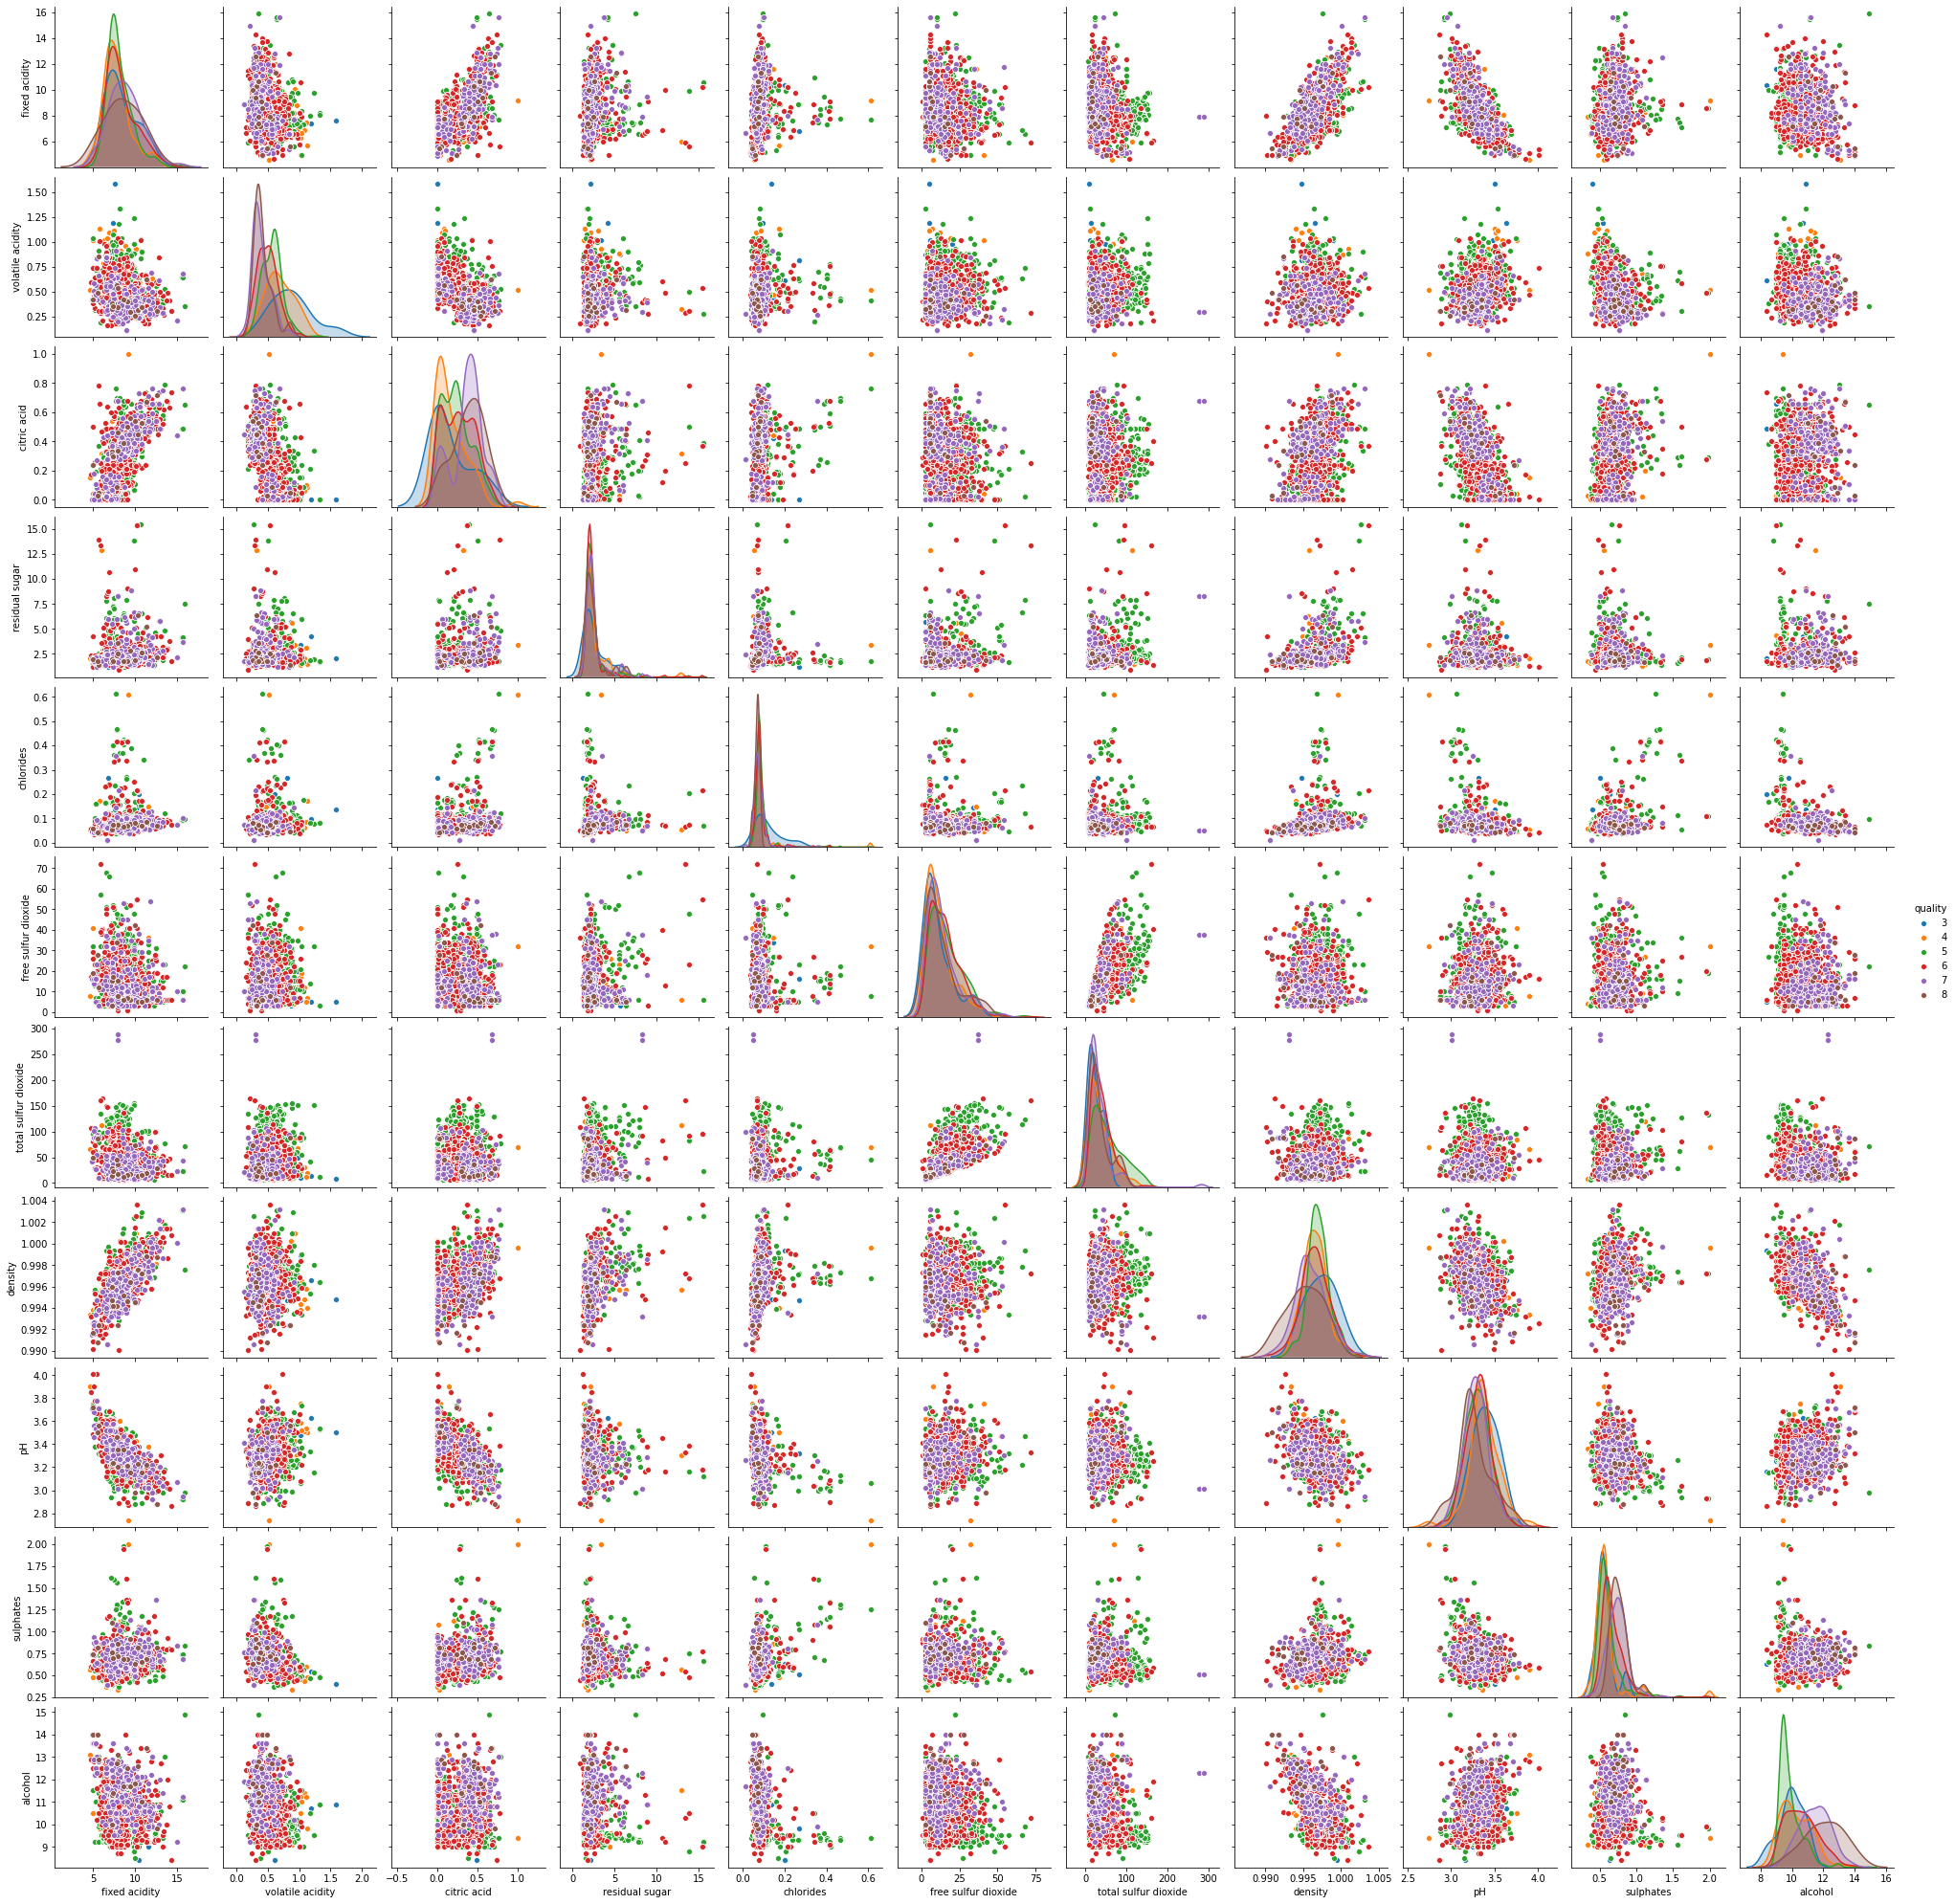

In [122]:
sns.pairplot(df,hue='quality')
plt.show